In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("Results_21Mar2022.csv")


In [7]:
import plotly.express as px

# Prepare a summarized dataset: average environmental metrics by diet_group
summary_df = df.groupby("diet_group")[[
    "mean_ghgs", "mean_land", "mean_watscar", "mean_eut",
    "mean_ghgs_ch4", "mean_ghgs_n2o", "mean_bio", "mean_watuse", "mean_acid"
]].mean().reset_index()

# Normalize the values for radar chart
normalized_df = summary_df.copy()
metrics = normalized_df.columns[1:]

# Min-max normalization
for col in metrics:
    min_val = normalized_df[col].min()
    max_val = normalized_df[col].max()
    normalized_df[col] = (normalized_df[col] - min_val) / (max_val - min_val)

# Melt the dataframe for Plotly radar chart format
radar_df = normalized_df.melt(id_vars=["diet_group"], var_name="Metric", value_name="Normalized Value")

# Create radar chart
fig = px.line_polar(
    radar_df,
    r="Normalized Value",
    theta="Metric",
    color="diet_group",
    line_close=True,
    title="Environmental Impact by Diet Group (Normalized Radar Chart)"
)

fig.update_traces(fill='toself')
fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0, 1])))

fig.show()

In [8]:
# Prepare data: average GHG emissions grouped by diet, sex, and age
treemap_data = df.groupby(['diet_group', 'sex', 'age_group'])['mean_ghgs'].mean().reset_index()

# Plot the treemap
fig = px.treemap(
    treemap_data,
    path=['diet_group', 'sex', 'age_group'],  # Hierarchy
    values='mean_ghgs',
    color='mean_ghgs',
    color_continuous_scale='RdBu',
    title='Treemap of Mean Greenhouse Gas Emissions by Diet, Gender, and Age Group'
)

fig.show()

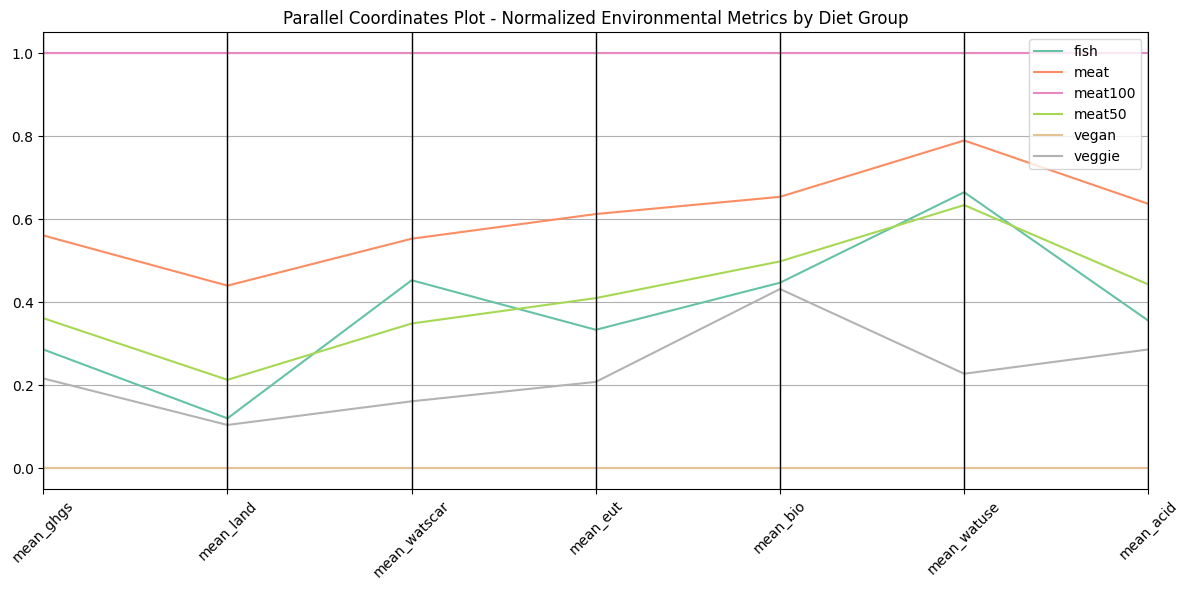

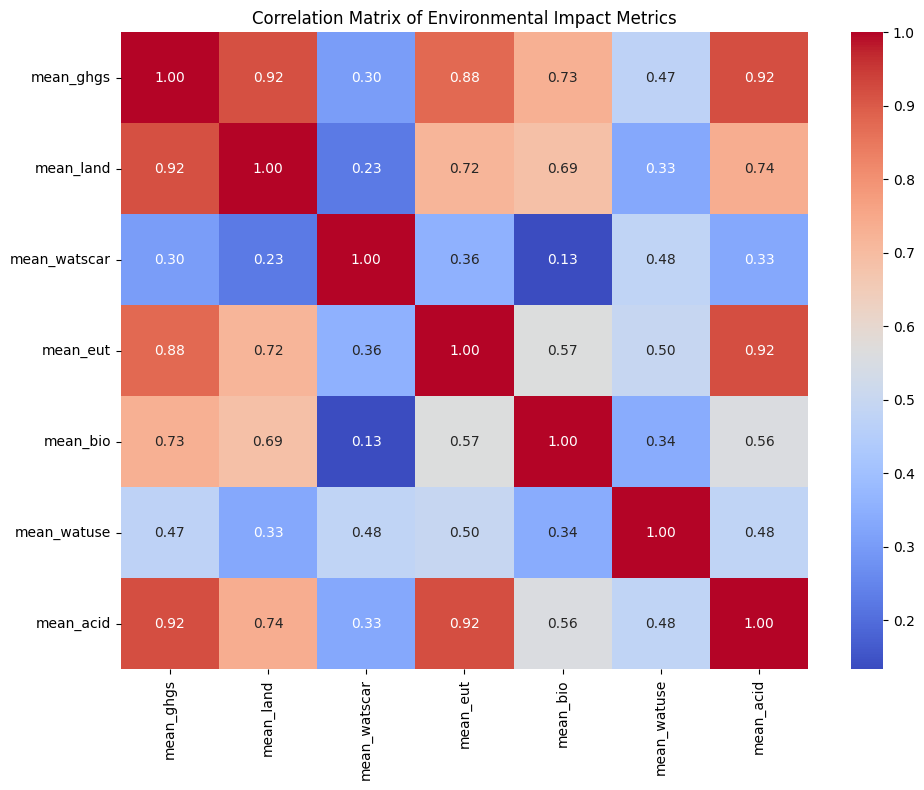

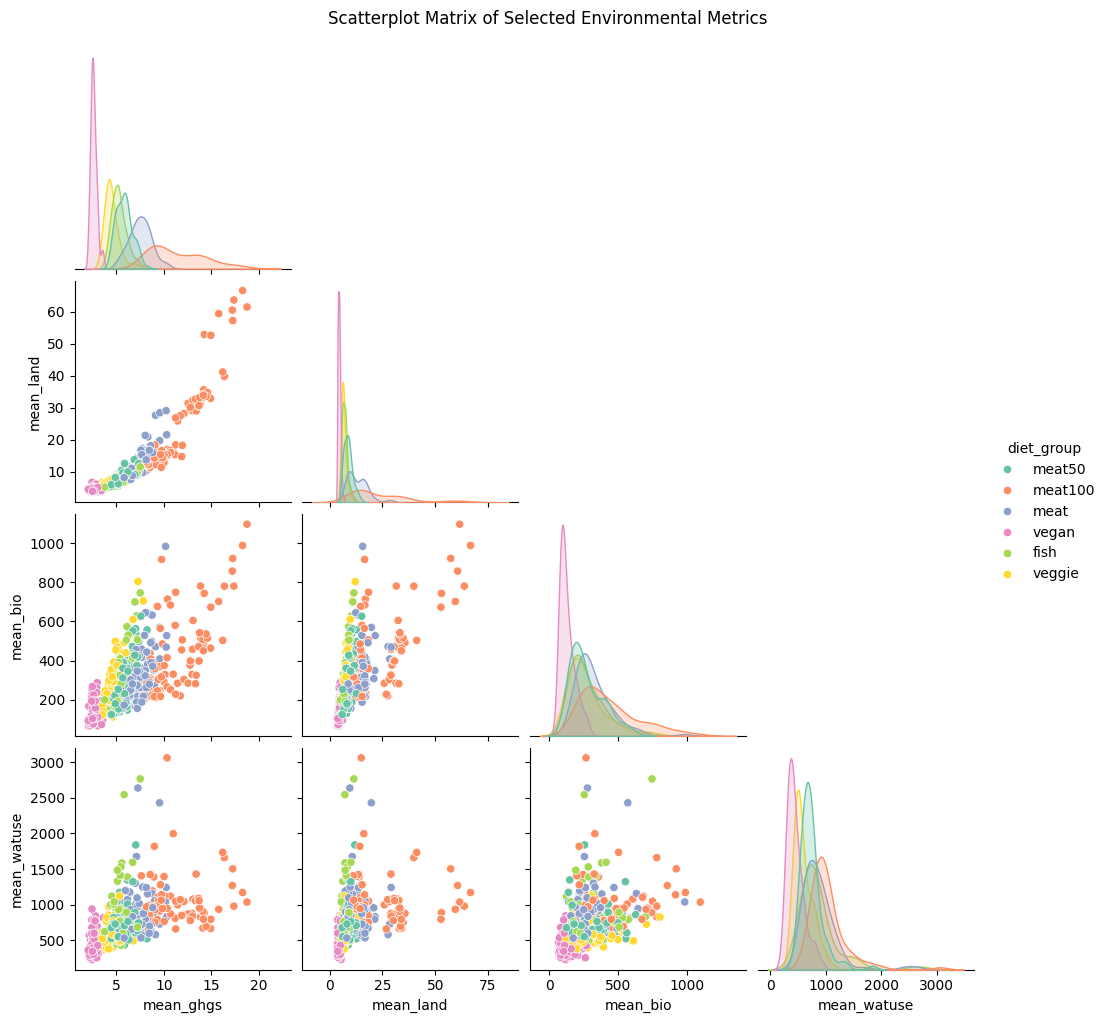

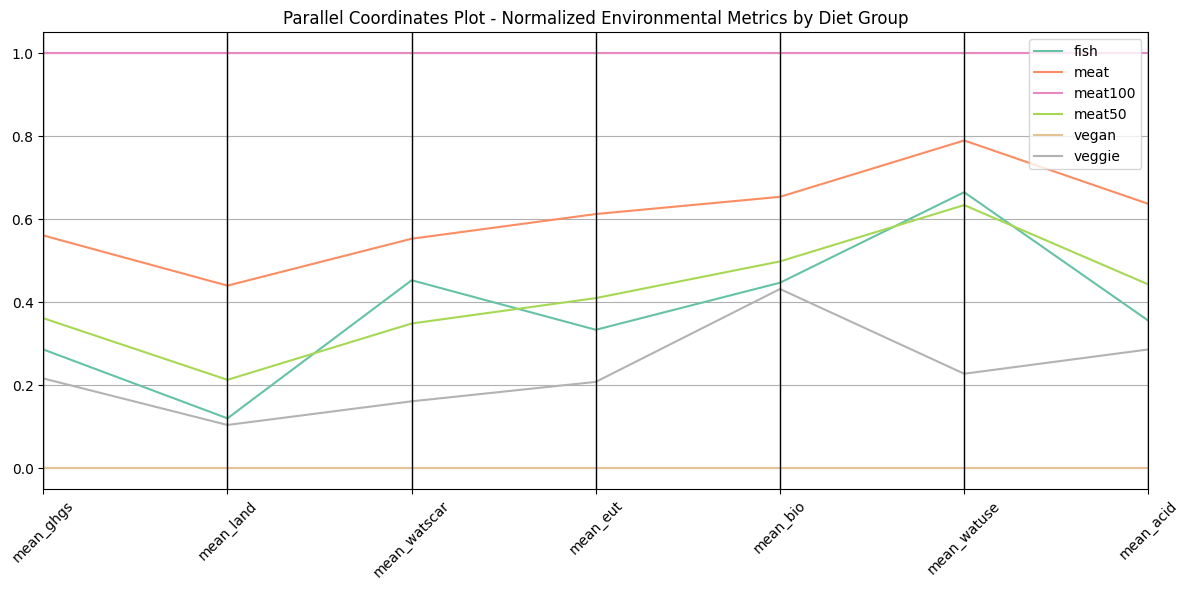

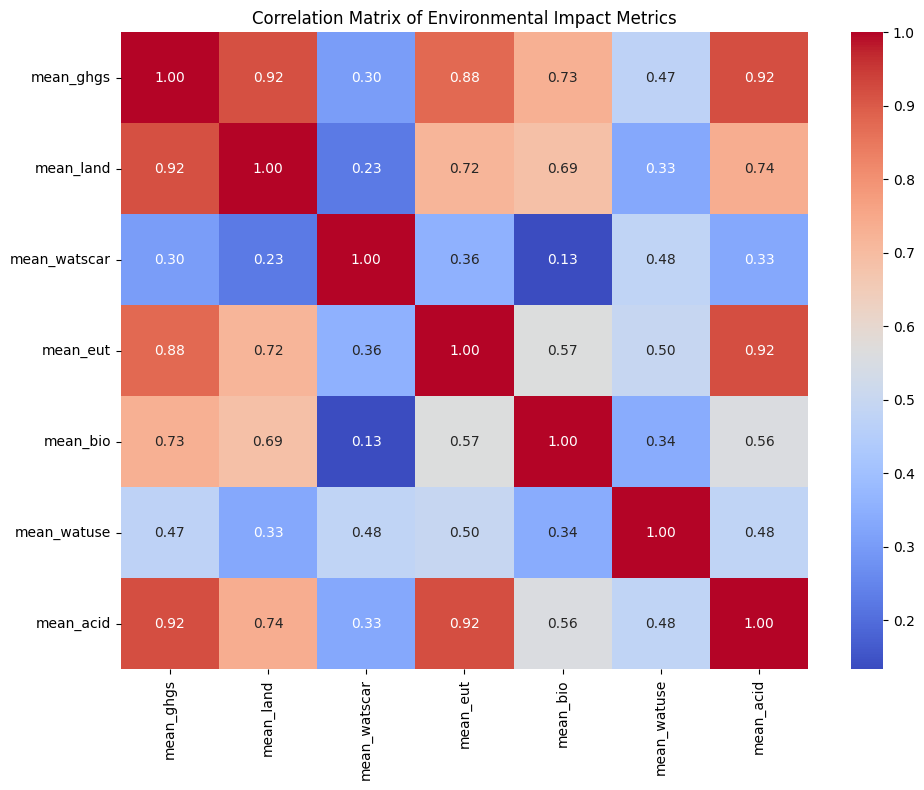

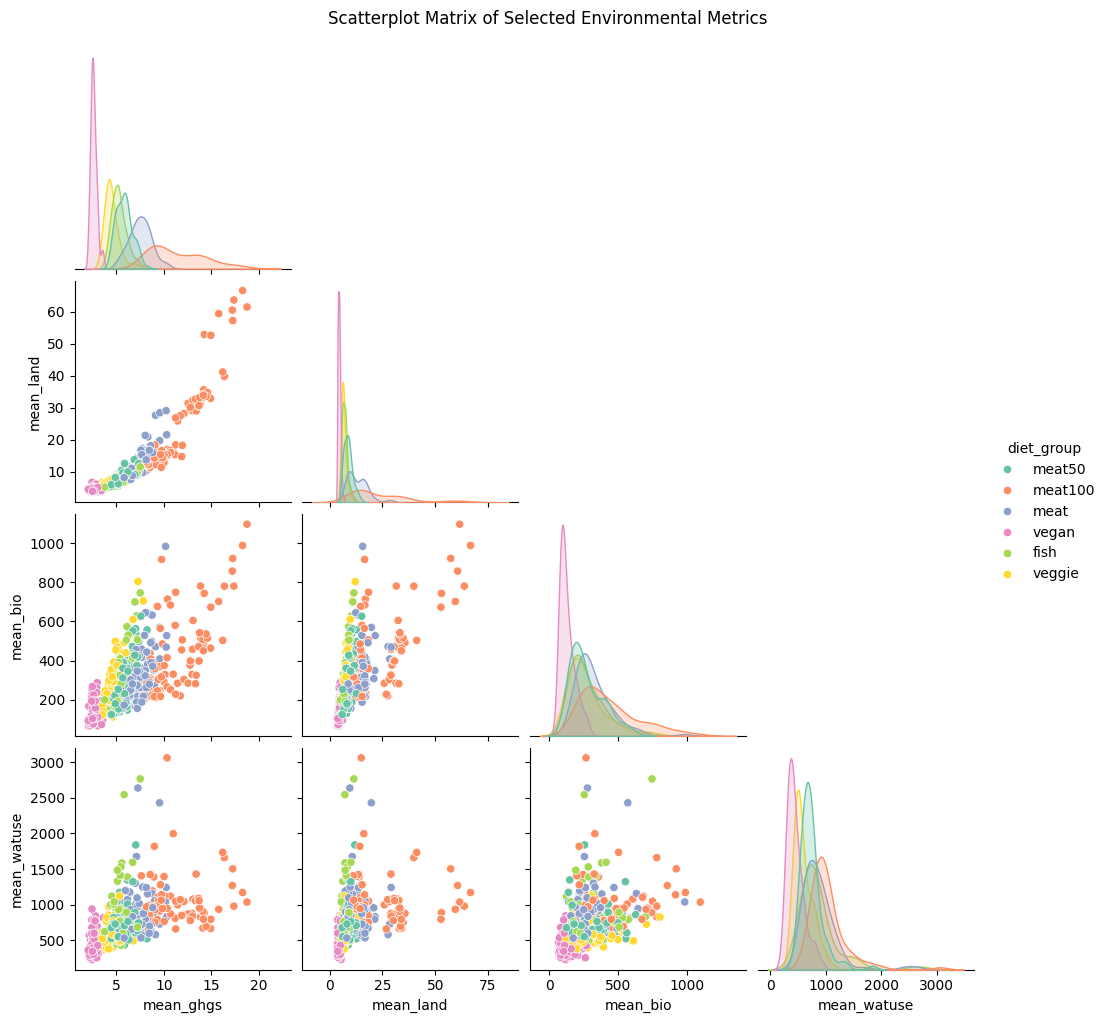

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# 1. Parallel Coordinates Plot (using Plotly)
from pandas.plotting import parallel_coordinates

# Prepare data: average metrics per diet group
metrics = ["mean_ghgs", "mean_land", "mean_watscar", "mean_eut", "mean_bio", "mean_watuse", "mean_acid"]
parallel_df = df.groupby("diet_group")[metrics].mean().reset_index()

# Normalize for plotting
normalized = parallel_df.copy()
for col in metrics:
    normalized[col] = (normalized[col] - normalized[col].min()) / (normalized[col].max() - normalized[col].min())

# 2. Correlation Matrix (Matrix Chart)
correlation_matrix = df[metrics].corr()

# 3. Scatterplot Matrix using Seaborn
scatter_df = df[["diet_group", "mean_ghgs", "mean_land", "mean_bio", "mean_watuse"]].copy()
scatter_sample = scatter_df.sample(500, random_state=42)  # Sample for plotting

# Generate all plots
import matplotlib.pyplot as plt

# Parallel Coordinates Plot
plt.figure(figsize=(12, 6))
parallel_coordinates(normalized, 'diet_group', colormap=plt.get_cmap("Set2"))
plt.title('Parallel Coordinates Plot - Normalized Environmental Metrics by Diet Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Environmental Impact Metrics")
plt.tight_layout()
plt.show()

# Scatterplot Matrix
sns.pairplot(scatter_sample, hue="diet_group", palette="Set2", corner=True)
plt.suptitle("Scatterplot Matrix of Selected Environmental Metrics", y=1.02)
plt.show()
# 1. Parallel Coordinates Plot (using Plotly)
from pandas.plotting import parallel_coordinates

# Prepare data: average metrics per diet group
metrics = ["mean_ghgs", "mean_land", "mean_watscar", "mean_eut", "mean_bio", "mean_watuse", "mean_acid"]
parallel_df = df.groupby("diet_group")[metrics].mean().reset_index()

# Normalize for plotting
normalized = parallel_df.copy()
for col in metrics:
    normalized[col] = (normalized[col] - normalized[col].min()) / (normalized[col].max() - normalized[col].min())

# 2. Correlation Matrix (Matrix Chart)
correlation_matrix = df[metrics].corr()

# 3. Scatterplot Matrix using Seaborn
scatter_df = df[["diet_group", "mean_ghgs", "mean_land", "mean_bio", "mean_watuse"]].copy()
scatter_sample = scatter_df.sample(500, random_state=42)  # Sample for plotting

# Generate all plots
import matplotlib.pyplot as plt

# Parallel Coordinates Plot
plt.figure(figsize=(12, 6))
parallel_coordinates(normalized, 'diet_group', colormap=plt.get_cmap("Set2"))
plt.title('Parallel Coordinates Plot - Normalized Environmental Metrics by Diet Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Environmental Impact Metrics")
plt.tight_layout()
plt.show()

# Scatterplot Matrix
sns.pairplot(scatter_sample, hue="diet_group", palette="Set2", corner=True)
plt.suptitle("Scatterplot Matrix of Selected Environmental Metrics", y=1.02)
plt.show()